In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import matplotlib.image as mpimg

from sklearn.metrics import confusion_matrix, precision_score , recall_score, f1_score , accuracy_score
from mlxtend.plotting import plot_confusion_matrix

print("Impporting library is successful")

Impporting library is successful


In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive")
!git clone https://github.com/Avijit009/Tumor_Cell_Images.git

/bin/bash: google-drive-ocamlfuse: command not found
Cloning into 'Tumor_Cell_Images'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 233 (delta 2), reused 233 (delta 2), pack-reused 0
Receiving objects: 100% (233/233), 6.84 MiB | 5.27 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
infected = os.listdir ("Tumor_Cell_Images/Tumor/yes")
num_of_tumor= len(infected)
print(num_of_tumor)

uninfected = os.listdir ("Tumor_Cell_Images/Tumor/no")
num_of_no_tumor= len(uninfected)

print(num_of_no_tumor)

155
98


In [4]:
images = []
image_labels = []
for i in infected:
    print(i)
    try:
    
        reading_image = cv2.imread('Tumor_Cell_Images/Tumor/yes/'+i)
        image_array = Image.fromarray(reading_image , 'RGB')

        image_resize = image_array.resize((64 , 64))
        rotate_image_60_degree = image_resize.rotate(60)
        rotate_image_75_degree = image_resize.rotate(75)
        blur = cv2.blur(np.array(image_resize) ,(10,10))

        images.append(np.array(image_resize))
        images.append(np.array(rotate_image_60_degree))
        images.append(np.array(rotate_image_75_degree))
        images.append(np.array(blur))

        image_labels.append(0)
        image_labels.append(0)
        image_labels.append(0)
        image_labels.append(0)

    except AttributeError:
        print('')


for u in uninfected:
    print(u)

    try:
        
        reading_image = cv2.imread('Tumor_Cell_Images/Tumor/no/'+u)
        image_array = Image.fromarray(reading_image , 'RGB')

        image_resize = image_array.resize((64 , 64))
        rotate_image_60_degree = image_resize.rotate(60)
        rotate_image_75_degree = image_resize.rotate(75)

        images.append(np.array(image_resize))
        images.append(np.array(rotate_image_60_degree))
        images.append(np.array(rotate_image_75_degree))

        image_labels.append(1)
        image_labels.append(1)
        image_labels.append(1)

        
    except AttributeError:
        print('')




Y104.jpg
Y99.JPG
Y41.jpg
Y59.JPG
Y77.jpg
Y248.JPG
Y188.jpg
Y14.jpg
Y28.jpg
Y158.JPG
Y37.jpg
Y53.jpg
Y97.JPG
Y159.JPG
Y52.jpg
Y92.png
Y45.JPG
Y101.jpg
Y148.JPG
Y51.jpg
Y15.jpg
Y10.jpg
Y6.jpg
Y163.JPG
Y35.jpg
Y167.JPG
Y61.jpg
Y168.jpg
Y65.JPG
Y251.JPG
Y50.JPG
Y38.jpg
Y107.jpg
Y26.jpg
Y40.JPG
Y25.jpg
Y157.JPG
Y78.jpg
Y193.JPG
Y21.jpg
Y46.jpg
Y16.JPG
Y254.jpg
Y2.jpg
Y90.jpg
Y85.JPG
Y253.JPG
Y54.jpg
Y29.jpg
Y76.jpg
Y39.jpg
Y108.jpg
Y115.JPG
Y42.jpg
Y109.JPG
Y120.JPG
Y33.jpg
Y47.JPG
Y22.jpg
Y246.JPG
Y69.jpg
Y73.jpg
Y255.JPG
Y49.JPG
Y81.jpg
Y82.jpg
Y249.JPG
Y8.jpg
Y259.JPG
Y187.jpg
Y146.JPG
Y30.jpg
Y182.JPG
Y11.jpg
Y169.jpg
Y180.jpg
Y250.jpg
Y12.jpg
Y243.JPG
Y154.jpg
Y62.jpg
Y258.JPG
Y113.JPG
Y18.JPG
Y155.JPG
Y186.jpg
Y95.jpg
Y257.jpg
Y44.JPG
Y31.jpg
Y116.JPG
Y66.JPG
Y244.JPG
Y105.jpg
Y194.jpg
Y55.jpg
Y112.JPG
Y183.jpg
Y27.jpg
Y245.jpg
Y17.jpg
Y106.jpg
Y161.JPG
Y195.JPG
Y3.jpg
Y184.JPG
Y13.jpg
Y170.JPG
Y162.jpg
Y23.JPG
Y9.jpg
Y164.JPG
Y79.jpg
Y74.jpg
Y242.JPG
Y256.JPG
Y34.jpg
Y156.JPG
Y114.JP

In [5]:
image_cells = np.array(images)
image_labels = np.array(image_labels)

np.save('Image cells' , image_cells)

np.save('Image labels' , image_labels)

In [6]:
print('Image cells : {} | Image labels: {}'.format(image_cells.shape , image_labels.shape))

Image cells : (914, 64, 64, 3) | Image labels: (914,)


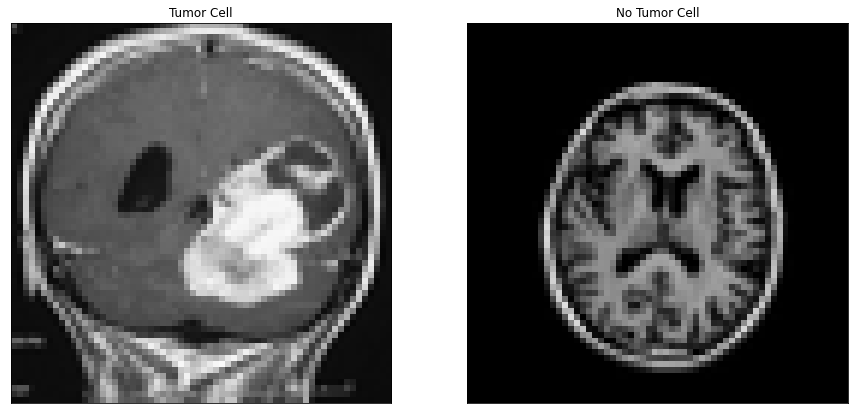

In [8]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(image_cells[0])
plt.title('Tumor Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(image_cells[650])
plt.title('No Tumor Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [9]:
n = np.arange(image_cells.shape[0])
np.random.shuffle(n)
image_cells = image_cells[n]
image_labels = image_labels[n]

In [10]:
image_cells = image_cells.astype(np.float32)
image_labels = image_labels.astype(np.int32)
image_cells = image_cells/255

In [11]:
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(image_cells , image_labels , 
                                            test_size = 0.30 ,
                                            random_state = 111)

val_x , test_x , val_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

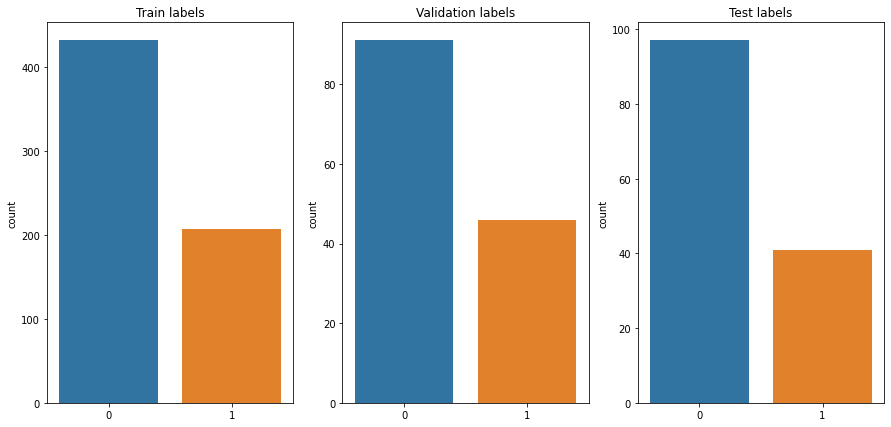

In [12]:
plt.figure(1 , figsize = (15 ,7))
n = 0 
for z , j in zip([train_y , val_y , test_y] , ['Train labels','Validation labels','Test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [13]:
print('Train data shape {} ,Validation data shape {} , Test data shape {}'.format(train_x.shape,
                                                                           val_x.shape ,
                                                                           test_x.shape))

Train data shape (639, 64, 64, 3) ,Validation data shape (137, 64, 64, 3) , Test data shape (138, 64, 64, 3)


In [14]:
from tensorflow.python.framework import ops

In [15]:
ops.reset_default_graph()

def cnn_model_function(features , labels , mode):

    input_layers = tf.reshape(features['x'] , [-1 , 64 , 64 ,3])    

    convolution_1 = tf.layers.conv2d(
        inputs = input_layers , 
        filters = 64 , 
        kernel_size = [5 , 5],
        padding = 'same',
        activation = tf.nn.relu
        ) 
    
    convolution_2 = tf.layers.conv2d(
        inputs = convolution_1, 
        filters = 100,
        kernel_size = [3 , 3],
        padding = 'valid',
        activation = tf.nn.relu
        )
    

    convolution_3 = tf.layers.conv2d(
        inputs = convolution_2, 
        filters = 15,
        kernel_size = [3 , 3],
        padding = 'same',
        activation = tf.nn.relu
        )
    
    max_pool_2 = tf.layers.max_pooling2d(inputs = convolution_3 , pool_size = [2 , 2] , strides = 2 )
    
    pool_2_flatten = tf.layers.flatten(max_pool_2)

    density_1 = tf.layers.dense(
        inputs = pool_2_flatten,
        units = 2048,
        activation = tf.nn.relu
        )
    density_2 = tf.layers.dense(
        inputs = density_1,
        units = 1024,
        activation = tf.nn.relu
        )
    
    dropout = tf.layers.dropout(
        inputs = density_2, 
        rate = 0.3, 
        training = (mode == "train"))

    
    logits = tf.layers.dense(
        inputs = dropout ,
        units = 10
        )
    
    predictions = {
        'predict_classes': tf.argmax(input = logits , axis = 1),
        'probabilities': tf.nn.softmax(logits , name = 'softmax_tensor')
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode , 
                                          predictions = predictions)
    
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels , logits = logits)
  
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.00001)
        train_optimizer = optimizer.minimize(loss = loss , 
                                      global_step = tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode = mode , 
                                            loss = loss , 
                                            train_op = train_optimizer 
                                           )
    evaluation_metric_optimizer = {'accuracy' : tf.metrics.accuracy(labels = labels ,
                                         predictions =  predictions['predict_classes'])}
    
    return tf.estimator.EstimatorSpec(mode = mode , 
                                      loss = loss , 
                                      eval_metric_ops = evaluation_metric_optimizer)    

In [16]:
tumor_cell_detector = tf.estimator.Estimator(model_fn = cnn_model_function , model_dir = '/tmp/modelchkpt')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/modelchkpt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [18]:
tensors_to_log = {'probabilities':'softmax_tensor'}
logging_hook = tf.train.LoggingTensorHook(
    tensors = tensors_to_log , every_n_iter = 10 
                 )

In [19]:
train_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},
    y = train_y,
    batch_size = 100 , 
    num_epochs = None , 
    shuffle = True
    )

In [20]:
tumor_cell_detector.train(input_fn = train_input_function ,
                             steps = 100,
                             hooks = [logging_hook])

#tumor_cell_detector.train(input_fn = train_input_function ,
#                            steps = 100)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/modelchkpt/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:probabilities = [[0.08713071 0.09015995 0.10307091 0.09648939 0.10189971 0.10067827
  0.0940909  0.10222244 0.12365506 0.10060263]
 [0.10000458 0.08436464 0.09548436 0.09984654 0.10236451 0.10242595
  0.09231338 0.08796487 0.12762176 0.1076094 ]
 [0.09301595 0.08932661 0.09874622 0.09033051 0.0959316  0.0985752
  0.10408792 0.08194555 0.12746325 0.12057715]
 [0.08962096 0.08190144 0.10288335 0.09909206 0.1000516  0.09601624
  0.0975612  0.08775327 0.13239042 0.11272938]


In [21]:
validation_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': val_x},
    y = val_y,
    num_epochs = 10 ,
    batch_size = 100 , 
    shuffle = True
    )
validation_results = tumor_cell_detector.evaluate(input_fn = validation_input_function)
print(validation_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-11T14:23:59


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkpt/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 19.79604s
INFO:tensorflow:Finished evaluation at 2021-12-11-14:24:19
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.7591241, global_step = 100, loss = 0.52190506
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/modelchkpt/model.ckpt-100
{'accuracy': 0.7591241, 'loss': 0.52190506, 'global_step': 100}


In [22]:
test_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': test_x},
    y = test_y,
    num_epochs = 10 ,
    batch_size = 100 , 
    shuffle = True
    )
test_results = tumor_cell_detector.evaluate(input_fn = test_input_function)
print(test_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-11T14:24:24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkpt/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 19.91221s
INFO:tensorflow:Finished evaluation at 2021-12-11-14:24:43
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.8115942, global_step = 100, loss = 0.43541238
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/modelchkpt/model.ckpt-100
{'accuracy': 0.8115942, 'loss': 0.43541238, 'global_step': 100}


In [23]:
train_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},
    y = train_y , 
    num_epochs = 10 , 
    batch_size = 100 , 
    shuffle = True
    )
train_results = tumor_cell_detector.evaluate(input_fn = train_input_function)
print(test_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-11T14:24:51


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkpt/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 93.60908s
INFO:tensorflow:Finished evaluation at 2021-12-11-14:26:25
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.8169014, global_step = 100, loss = 0.4576561
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/modelchkpt/model.ckpt-100
{'accuracy': 0.8115942, 'loss': 0.43541238, 'global_step': 100}


In [24]:
prediction_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x' : test_x},
    y = test_y,
    num_epochs = 10,
    batch_size = 100 , 
    shuffle = True
    )

y_pred = tumor_cell_detector.predict(input_fn = prediction_input_function)
predict_classes = [p['predict_classes'] for p in y_pred]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Restoring parameters from /tmp/modelchkpt/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [25]:
print('{} \n{} \n{} \n{}'.format(precision_score(test_y , predict_classes) , 
                           recall_score(test_y , predict_classes) ,
                           f1_score(test_y , predict_classes) , 
                           accuracy_score(test_y , predict_classes)))

ValueError: ignored

In [ ]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(16):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(4 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_x[r[0]])
    plt.title('true {} : pred {}'.format(test_y[r[0]] , predict_classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
conf_matrix = confusion_matrix(test_y, predict_classes)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5,5), cmap=plt.cm.Reds)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

In [ ]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()